# Week 2: Calculus

In [1]:
#importing libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Day 3: Numerical Optimization Methods
* So far we covered **exact** optimization, i.e. we calculated the minima/maxima of functions directly and exactly. This approach is not always the best
* There are cases when the function $f$ is so complex that differentiation may not be feasible
* In other cases soving the equation $f' = 0$ is not possible, at least not *analytically*, so we have to resort to approximating the solutions
* These, and similar scenarios, give rise to the methods for **numerical optimization** which avoid solving $f' = 0$ and might even avoid using derivatives at all. Today we discuss two such methods
* Numerical optimization algorithms are *iterative* by design -- they start with some initial approximation and they improve it until satisfactory result is obtained

### Gradient Descent Method
* This method finds the minimum of the input function (can be modified to work for finding maxima as well)
* Let $f(x)$ be the function we wish to minimize. We make an initial guess about the minimum, and we call this initial approximation $x_0$
* The method then generates an iterative sequence of improved approximations $x_1, x_2, \ldots, x_k, x_{k+1}, \ldots$ which are eve closer to the actual minimum of the function
* The recursive relation between the *current* iterate $x_k$ and the *next* iterate $x_{k+1}$ for $k = 1, 2, \ldots$ is given by:\begin{equation}
x_{k+1} = x_k - \alpha \cdot f'(x_k)
\end{equation}
where $\alpha$ is called **learning rate** of the algorithm which controls the speed of convergence (i.e. approaching to the minimum). The learning rate is usually set to be fairly small. In the basic form of the algorithm, it is constant throughout the iterations

### Example 1
Find the minimum of the function $f(x) = x^2$ using the Gradient Descent Method, initial approximation $x_0 = 4$ and learning rate $\alpha = 0.2$

In [2]:
# get variables and functions
x = sp.symbols('x')
f = sp.Function('f', real=True)
f = x**2

# define the derivative as a Python function (not SymPy!)
df = sp.lambdify(x, f.diff())
f = sp.lambdify(x, f)

# run the algorithm
print("k\t xk\t\t f(xk)\t\t f'(xk)")
print('-------------------------------------------------------')

max_iter = 15
xk = 4
alpha = 0.2

for k in range(max_iter):
    print(f'{k}\t {np.round(xk, 4)}\t\t {np.round(f(xk), 4)}\t\t {np.round(df(xk), 4)}')
    xk = xk - alpha*df(xk)

k	 xk		 f(xk)		 f'(xk)
-------------------------------------------------------
0	 4		 16		 8
1	 2.4		 5.76		 4.8
2	 1.44		 2.0736		 2.88
3	 0.864		 0.7465		 1.728
4	 0.5184		 0.2687		 1.0368
5	 0.311		 0.0967		 0.6221
6	 0.1866		 0.0348		 0.3732
7	 0.112		 0.0125		 0.2239
8	 0.0672		 0.0045		 0.1344
9	 0.0403		 0.0016		 0.0806
10	 0.0242		 0.0006		 0.0484
11	 0.0145		 0.0002		 0.029
12	 0.0087		 0.0001		 0.0174
13	 0.0052		 0.0		 0.0104
14	 0.0031		 0.0		 0.0063


k	 xk		 f(xk)		 f'(xk)
-------------------------------------------------------
0	 4		 16		 8
1	 2.4		 5.76		 4.8
2	 1.44		 2.0736		 2.88
3	 0.864		 0.7465		 1.728
4	 0.5184		 0.2687		 1.0368
5	 0.311		 0.0967		 0.6221
6	 0.1866		 0.0348		 0.3732
7	 0.112		 0.0125		 0.2239
8	 0.0672		 0.0045		 0.1344
9	 0.0403		 0.0016		 0.0806
10	 0.0242		 0.0006		 0.0484
11	 0.0145		 0.0002		 0.029
12	 0.0087		 0.0001		 0.0174
13	 0.0052		 0.0		 0.0104
14	 0.0031		 0.0		 0.0063


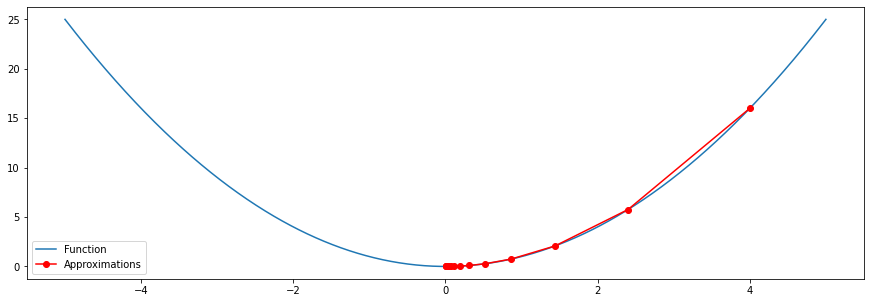

In [3]:
# Plot the sequence of points that approaches the minimum
# get variables and functions
x = sp.symbols('x')
f = sp.Function('f', real=True)
f = x**2

# define the derivative as a Python function (not SymPy!)
df = sp.lambdify(x, f.diff())
f = sp.lambdify(x, f)

# run the algorithm
print("k\t xk\t\t f(xk)\t\t f'(xk)")
print('-------------------------------------------------------')

max_iter = 15
xk = 4
alpha = 0.2

xs = []
ys = []

for k in range(max_iter):
    xs.append(xk)
    ys.append(f(xk))
    print(f'{k}\t {np.round(xk, 4)}\t\t {np.round(f(xk), 4)}\t\t {np.round(df(xk), 4)}')
    xk = xk - alpha*df(xk)

x = np.linspace(-5, 5, 1000)
y = f(x)

plt.figure(figsize=(15,5))
plt.plot(x, f(x), label='Function')
plt.plot(np.array(xs), np.array(ys), marker='o', c='r', label='Approximations')
plt.legend()
plt.show()

### Example 2
Find the minimum of the function $g(x) = \displaystyle 1-\frac{\ln x}{2x+3}$ using the Gradient Descent Method, and initial approximation $x_0$ and learning rate $\alpha$ of your choosing.

In [4]:
# define variables and functions
x = sp.symbols('x')
g = 1 - sp.ln(x)/(2*x + 3)
dg = g.diff()

# convert SymPy functions to Python functions
g = sp.lambdify(x, g)
dg = sp.lambdify(x, dg)


# run the algorithm
print("k\t xk\t\t f(xk)\t\t f'(xk)")
print('-------------------------------------------------------')

max_iter = 500
alpha = 5
xk = 10

for k in range(max_iter + 1):
    if (k % 50) == 0:
        print(f'{k}\t {np.round(xk, 4)}\t\t {np.round(g(xk), 4)}\t\t {np.round(dg(xk), 4)}')
    xk = xk - alpha*dg(xk)

print(f'The minimum of g(x) is x = {xk} with a minimum value of {np.round(g(xk), 5)}')

k	 xk		 f(xk)		 f'(xk)
-------------------------------------------------------
0	 10		 0.8999		 0.0044
50	 8.867		 0.8947		 0.0047
100	 7.6495		 0.8888		 0.005
150	 6.3893		 0.8825		 0.005
200	 5.232		 0.8771		 0.0041
250	 4.4401		 0.8745		 0.0022
300	 4.0988		 0.874		 0.0007
350	 3.9991		 0.874		 0.0002
400	 3.9747		 0.874		 0.0
450	 3.969		 0.874		 0.0
500	 3.9677		 0.874		 0.0
The minimum of g(x) is x = 3.967691744246136 with a minimum value of 0.87397


### Example 3
Find the **maximum** of the function $h(x) = \ln x - \sqrt{x}$ using the Gradient Descent Method, and initial approximation $x_0 = 1$ and learning rate $\alpha = 0.75$.

In [5]:
# define variables and functions
x = sp.symbols('x')
h = sp.ln(x) - sp.sqrt(x)
dh = h.diff()

# convert SymPy functions to Python functions
h = sp.lambdify(x, h)
dh = sp.lambdify(x, dh)


# run the algorithm
print("k\t xk\t\t f(xk)\t\t f'(xk)")
print('-------------------------------------------------------')

max_iter = 500
alpha = 0.75
xk = 1

for k in range(max_iter + 1):
    if (k % 10) == 0:
        print(f'{k}\t {np.round(xk, 4)}\t\t {np.round(h(xk), 4)}\t\t {np.round(dh(xk), 4)}')
    xk = xk + alpha*dh(xk)

print(f'The minimum of h(x) is x = {xk} with a minimum value of {np.round(h(xk), 5)}')

k	 xk		 f(xk)		 f'(xk)
-------------------------------------------------------
0	 1		 -1.0		 0.5
10	 2.4673		 -0.6676		 0.087
20	 2.9599		 -0.6353		 0.0472
30	 3.2501		 -0.6241		 0.0303
40	 3.4431		 -0.6192		 0.021
50	 3.5791		 -0.6167		 0.0151
60	 3.6782		 -0.6154		 0.0112
70	 3.752		 -0.6147		 0.0084
80	 3.8078		 -0.6143		 0.0064
90	 3.8504		 -0.6141		 0.0049
100	 3.8832		 -0.6139		 0.0038
110	 3.9086		 -0.6138		 0.0029
120	 3.9284		 -0.6138		 0.0023
130	 3.9438		 -0.6138		 0.0018
140	 3.9558		 -0.6137		 0.0014
150	 3.9652		 -0.6137		 0.0011
160	 3.9727		 -0.6137		 0.0009
170	 3.9785		 -0.6137		 0.0007
180	 3.983		 -0.6137		 0.0005
190	 3.9866		 -0.6137		 0.0004
200	 3.9895		 -0.6137		 0.0003
210	 3.9917		 -0.6137		 0.0003
220	 3.9935		 -0.6137		 0.0002
230	 3.9948		 -0.6137		 0.0002
240	 3.9959		 -0.6137		 0.0001
250	 3.9968		 -0.6137		 0.0001
260	 3.9975		 -0.6137		 0.0001
270	 3.998		 -0.6137		 0.0001
280	 3.9984		 -0.6137		 0.0
290	 3.9988		 -0.6137		 0.0
300	 3.999		 -0.6137		 0

### Stopping criterion based on $f'(x_k)$
* It is impossible to know how many iterations would be required to get a "good" approximation to the minimum
* Most frequently, we set a predetermined value for the maximum number of iterations we are *willing* to make
* Another approach is to check the absolute size of the derivative of the function, $|f'(x_k)|$; if this value is close to zero (in practice, less than some preset small *tolerance* threshold), we stop the algorithm since we are *sufficiently* close to a minimum point.
* Usual thresholds are $10^{-4}$ or $10^{-6}$
* Let's see this in practice with the modified parameters for the previous example

In [6]:
# run the algorithm
print("k\t xk\t\t f(xk)\t\t f'(xk)")
print('-------------------------------------------------------')

#max_iter = 500 #no need for max_iter in this example
alpha = 0.75
xk = 1
tol = 1e-5 #setting tolerance as 1e-4
k = 1


while abs(dh(xk)) >= tol:
    if (k % 10) == 0:
        print(f'{k}\t {np.round(xk, 5)}\t\t {np.round(h(xk), 5)}\t\t {np.round(dh(xk), 5)}')
    xk = xk + alpha*dh(xk)
    k = k + 1

#Print the last iteration:
print('Last step gives:')
print(f'{k}\t {xk:.2f}\t\t {h(xk)}\t\t {dh(xk)}')
print(f'The minimum of h(x) is x = {xk} with a minimum value of {h(xk)}')

k	 xk		 f(xk)		 f'(xk)
-------------------------------------------------------
10	 2.3966		 -0.67404		 0.09428
20	 2.92263		 -0.63709		 0.04969
30	 3.22642		 -0.62485		 0.03158
40	 3.4268		 -0.61953		 0.02172
50	 3.56738		 -0.61692		 0.01559
60	 3.66956		 -0.61554		 0.0115
70	 3.74552		 -0.61477		 0.00863
80	 3.80288		 -0.61434		 0.00656
90	 3.84665		 -0.61409		 0.00503
100	 3.88032		 -0.61394		 0.00388
110	 3.90637		 -0.61385		 0.00301
120	 3.92661		 -0.61379		 0.00235
130	 3.9424		 -0.61376		 0.00183
140	 3.95474		 -0.61374		 0.00143
150	 3.96441		 -0.61373		 0.00112
160	 3.97199		 -0.61372		 0.00088
170	 3.97795		 -0.61371		 0.00069
180	 3.98263		 -0.61371		 0.00055
190	 3.98631		 -0.61371		 0.00043
200	 3.98921		 -0.61371		 0.00034
210	 3.9915		 -0.61371		 0.00027
220	 3.9933		 -0.61371		 0.00021
230	 3.99471		 -0.61371		 0.00017
240	 3.99583		 -0.61371		 0.00013
250	 3.99671		 -0.61371		 0.0001
260	 3.99741		 -0.61371		 8e-05
270	 3.99795		 -0.61371		 6e-05
280	 3.99839		 -0.61371

### Putting the all of it together in a single function
* Write a Python function that will be an implementation of the Gradient Descent Method
* Input arguments are:
    * The function *f* and its derivative *df*
    * Initial approximation *x0*
    * Learning rate *alpha*, by default set to 0.01
    * Maximum number of iterations *max_it*, by default set to 500
    * Tolerance level for the gradient *tol*, by default set to 1e-6
* Output argoments are:
    * The minimum $x^*$
    * The minimum value $f(x^*)$
    * The absolute value of the derivative at the minimum, $\left|f'(x^*)\right|$
    * The number of iterations it took to obtain the result

In [7]:
def gradient_descent(f, df, x0, alpha = 0.01, max_iter = 500, tol = 1e-6):
    # initialize the sequence
    k = 0
    xk = x0
    dfk = df(x0)
    
    while k < max_iter and abs(dfk) > tol: # loop until we do not have a solution
        xk = xk - alpha * dfk # calculate the new iteration
        dfk = df(xk) # update the derivative
        k = k + 1 # increment the iteration number
    return xk, f(xk), abs(dfk), k

### Checking built-in optimizers in SciPy's optimization module
* `SciPy` has a great selection of very robust *optimizers*
* Among others, we single out:
    * `bisect`
    * `golden`
    * `fmin`
    * `fmin_*method*`
    * `minimuze`

In [8]:
# Import the scipy.optimize
import scipy.optimize as opt

In [9]:
# Try some of the optimizers on the functions we defined


In [11]:
gradient_descent(f, df, 5)

(0.00020511992572736317, 4.207418393039899e-08, 0.00041023985145472635, 500)